In [54]:
import numpy as np
import pandas as pd
import copy
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import log_loss

In [178]:
# load raw financial data

# daily resolution
# historical_data = pd.read_csv('../foobar/data/raw/stock_candle_D_2020-03-01_2021-01-01.csv')
# short_squzeet_data = pd.read_csv('../foobar/data/raw/stock_candle_D_2020-12-01_2021-03-01.csv')

# hourly resolution
historical_data = pd.read_csv('../foobar/data/raw/stock_candle_60_2020-03-01_2021-01-01.csv')
short_squzeet_data = pd.read_csv('../foobar/data/raw/stock_candle_60_2020-12-01_2021-03-01.csv')
print(historical_data.shape)
print(short_squzeet_data.shape)

historical_data['datetime'] = pd.to_datetime(historical_data['timestamp'], unit='s')
historical_data = historical_data.sort_values(by=['timestamp'], axis=0)

short_squzeet_data['datetime'] = pd.to_datetime(short_squzeet_data['timestamp'], unit='s')
short_squzeet_data = short_squzeet_data.sort_values(by=['timestamp'], axis=0)
historical_data = historical_data.set_index('datetime')
short_squzeet_data = short_squzeet_data.set_index('datetime')
short_squzeet_data.head(50)

(1610, 7)
(702, 7)


,timestamp,close_price,high-price,low-price,open_price,status,volume
datetime,,,,,,,
2020-12-01 09:00:00,1606813200,17.500,17.50,16.900,16.900,ok,11035
2020-12-01 10:00:00,1606816800,17.480,17.65,17.440,17.500,ok,12780
2020-12-01 12:00:00,1606824000,17.060,17.40,17.000,17.400,ok,44953
2020-12-01 14:00:00,1606831200,16.720,17.50,16.420,17.200,ok,2248255
2020-12-01 15:00:00,1606834800,16.350,16.91,15.770,16.750,ok,3092167
2020-12-01 16:00:00,1606838400,16.400,16.90,16.310,16.350,ok,1398898
2020-12-01 17:00:00,1606842000,16.380,16.45,16.060,16.390,ok,1005827
2020-12-01 18:00:00,1606845600,16.090,16.39,16.050,16.380,ok,789452
2020-12-01 19:00:00,1606849200,15.990,16.21,15.940,16.090,ok,737231


## Data Preprocessing

In [179]:
# create train and test dataset
# sorted based on timestamp 

# extract timestamps for visualization
train_datetime_list = list(historical_data.index)

test_datetime_list = list(short_squzeet_data.index)

# select feature columns for training and predictions
df_train = historical_data.drop(['status'],axis=1)
df_test = short_squzeet_data.drop(['status'],axis=1)

# create a list of column names for training and predictions
cols = list(df_train)
# reordering the columns: put the prediction column to the last column
cols = ['open_price', 'high-price', 'low-price', 'volume','close_price']
df_train = df_train[cols]
df_test = df_test[cols]

# check the df column types to ensure they have correct types
print(df_train.dtypes)
print(len(test_timestamp_list))
print(short_squzeet_data.shape)
cols

open_price     float64
high-price     float64
low-price      float64
volume           int64
close_price    float64
dtype: object
61
(702, 7)


['open_price', 'high-price', 'low-price', 'volume', 'close_price']

<AxesSubplot:xlabel='datetime'>

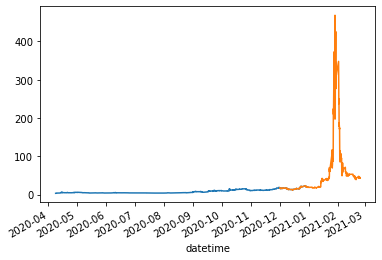

In [181]:
historical_data['close_price'].plot()
short_squzeet_data['close_price'].plot()

In [182]:
# finding missing values
df_train.isnull().sum()

open_price     0
high-price     0
low-price      0
volume         0
close_price    0
dtype: int64

In [183]:
df_test.isnull().sum()

open_price     0
high-price     0
low-price      0
volume         0
close_price    0
dtype: int64

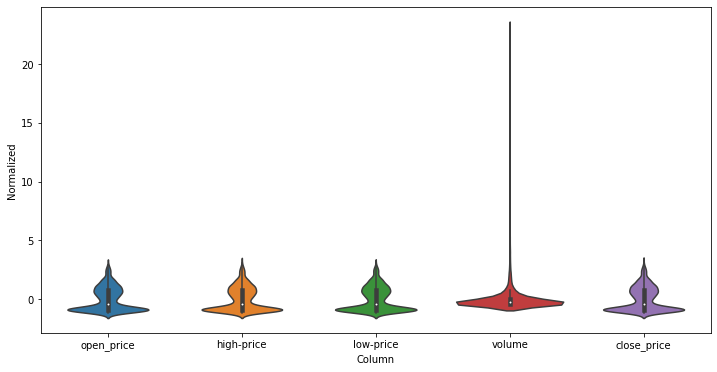

In [184]:
# Visualize the ditribution of the features in the train dataset
df_std = (df_train - df_train.mean()) / df_train.std()
df_std = df_std.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)


In [185]:
# scale / normalize the dataset
sc = StandardScaler()
train_arr = sc.fit_transform(df_train)
test_set = sc.fit_transform(df_test)


# scaling true value of prediction column
# sc_prediction = StandardScaler() 
# prediction_set_scaled = sc_prediction.fit_transform(df['close_price'].to_numpy().reshape(-1,1))

print(train_arr.shape[0])

# keep last 30 days of data as test set 
# split the data to train, validate and test
n = len(train_arr)

train_set = train_arr
val_set = train_arr[int(n*0.8):]

print(train_set.shape)
print(val_set.shape)
print(test_set.shape)

1610
(1610, 5)
(322, 5)
(702, 5)


### Data Windowing for time series forecasting

> Refer to [Data Windowing](https://www.tensorflow.org/tutorials/structured_data/time_series#data_windowing) for more details


In [186]:
# Generate time windows for time series forecasting with LSTM network
def generate_window(dataset, train_window, train_step):
    dataset_seq = []
    size = len(dataset)
    x_arr = []
    y_arr = []
    for i in range(size - train_window -1):
        x = dataset[i:(i+train_window), :-1]
        y = dataset[i+train_window:i+train_window+train_step, -1]
        x_arr.append(x)
        y_arr.append(y)
        dataset_seq.append((x, y))
    return np.array(x_arr), np.array(y_arr)

# let's create sequential training dataset with traning window = 30 days and train step = 1 day
# given that the financial data timestep is 1 hour 
# train_window = 30*24*3600*15    
# train_step = 1*24*3600*15
# given 1 day resolution
train_window = 24
train_step = 1

X_train, y_train = generate_window(train_set, train_window, train_step)
X_val, y_val = generate_window(val_set, train_window, train_step)
X_test, y_test = generate_window(test_set, train_window, train_step)

datetime_test = test_datetime_list[train_window:-1]
print(len(datetime_test))

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

print(X_test.shape)
print(y_test.shape)

num_features = X_train.shape[2]

677
torch.Size([1585, 24, 4])
torch.Size([1585, 1])
torch.Size([297, 24, 4])
torch.Size([297, 1])
torch.Size([677, 24, 4])
torch.Size([677, 1])


## Creating LSTM Network

In [187]:

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size=100, num_layers = 2, output_size=1, seq_length=30):
        super(LSTM, self).__init__()

        self.input_size = input_size
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.seq_len = seq_length
        
        self.hidden = None

        self.lstm = nn.LSTM(
            input_size=self.input_size,
            hidden_size=self.hidden_size,
            num_layers=self.num_layers,
            dropout=0.2,
            batch_first=True
        )

        self.linear = nn.Linear(self.hidden_size * self.seq_len, self.output_size)

    def init_hidden(self, batch_size):
        hidden_state = torch.zeros(self.num_layers, batch_size ,self.hidden_size)
        cell_state = torch.zeros(self.num_layers, batch_size ,self.hidden_size)
        self.hidden = (hidden_state, cell_state)

    def forward(self, x, forecast_timesteps = 0):
        batch_size = x.shape[0]
        if self.hidden is None:
            self.init_hidden(batch_size)
        
        lstm_out, self.hidden = self.lstm(
                x,
                self.hidden
            )
        
        outputs = self.linear(lstm_out.reshape(batch_size,-1))

        return outputs


## Traning LSTM model

In [188]:
num_epochs = 150
learning_rate = 1e-3

history = dict(train=[], val=[])
# create a LSTM model with default args defined above
model = LSTM(seq_length=train_window, input_size=num_features)
print(model.input_size)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

4


In [189]:
# best_model_wts = copy.deepcopy(model.state_dict())
best_loss = np.Inf

# Train the model
for epoch in range(num_epochs):
    model.train()
    X_train.to(device)
    model.init_hidden(X_train.shape[0])
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()
    
    train_loss = loss.item()

    with torch.no_grad():
        model.eval()
        X_val.to(device)
        model.init_hidden(X_val.shape[0])
        pred = model(X_val)
        loss = criterion(pred, y_val)
        val_loss = loss.item()
        

    history['val'].append(val_loss)
    history['train'].append(train_loss)
   

    if val_loss < best_loss:
        best_loss = val_loss
        best_model_wts = copy.deepcopy(model.state_dict())

    print(f'Epoch {epoch}: train loss {train_loss} val loss {val_loss}')

# model.load_state_dict(best_model_wts)


Epoch 0: train loss 0.9887571334838867 val loss 2.4394900798797607
Epoch 1: train loss 0.9175234436988831 val loss 2.2328460216522217
Epoch 2: train loss 0.8417333364486694 val loss 1.990832805633545
Epoch 3: train loss 0.7502020001411438 val loss 1.696897268295288
Epoch 4: train loss 0.6356191039085388 val loss 1.339707851409912
Epoch 5: train loss 0.49295419454574585 val loss 0.9231242537498474
Epoch 6: train loss 0.3277660608291626 val loss 0.4843425154685974
Epoch 7: train loss 0.15923625230789185 val loss 0.13869471848011017
Epoch 8: train loss 0.04490475729107857 val loss 0.16518104076385498
Epoch 9: train loss 0.09728161245584488 val loss 0.48229482769966125
Epoch 10: train loss 0.22719396650791168 val loss 0.4451265037059784
Epoch 11: train loss 0.20468251407146454 val loss 0.24136881530284882
Epoch 12: train loss 0.11636658012866974 val loss 0.10285519063472748
Epoch 13: train loss 0.05170145630836487 val loss 0.08579114079475403
Epoch 14: train loss 0.03520667925477028 val lo

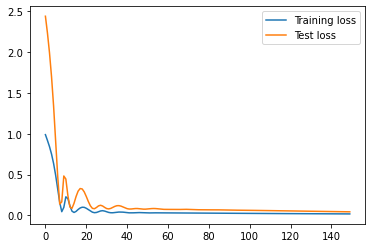

In [190]:

plt.plot(history['train'], label="Training loss")
plt.plot(history['val'], label="Test loss")
plt.legend()

## Predictions

In [191]:
predictions, losses = [], []
criterion = nn.L1Loss(reduction='sum').to(device)

with torch.no_grad():
    model.eval()
    for i in range(X_test.shape[0]):
        x_i = X_test[i:i+1]
        y_i = y_test[i:i+1]
        x_i.to(device)
        model.init_hidden(x_i.shape[0])
        y_pred = model(x_i)
        predictions.append(y_pred.cpu().numpy().flatten())
        loss = criterion(y_pred, y_i)
        losses.append(loss.item())

truth = y_test.cpu().numpy().flatten()

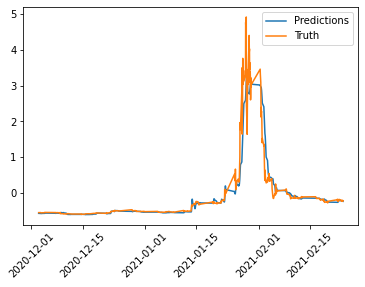

In [192]:

plt.plot(datetime_test ,predictions, label="Predictions")
plt.plot(datetime_test, truth, label="Truth")
plt.xticks(rotation=45)
plt.legend()

In [149]:
len(test_datetime_list)

192